In [73]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox
from statsmodels.tsa import stattools as st

In [74]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [10]:
df_dow = pd.read_csv("weekly-closings-of-the-dowjones-.csv", sep=',')

In [11]:
df_dow.head()

,Week,"Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974"
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


In [12]:
df_dow.columns

Index(['Week', 'Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974'], dtype='object')

In [13]:
dow_series = df_dow['Weekly closings of the Dow-Jones industrial average, July 1971 ? August 1974']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


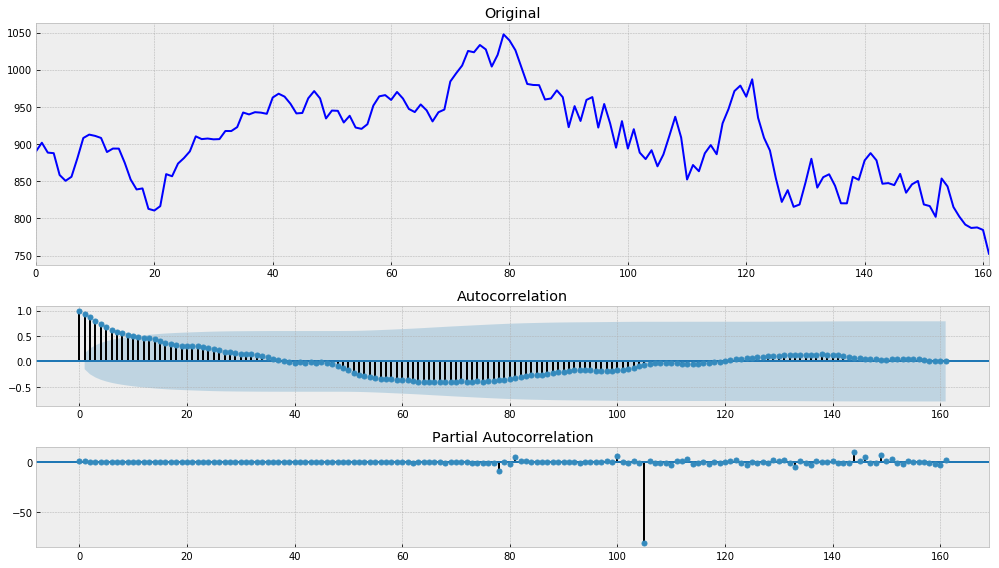

In [14]:
tsplot(dow_series)

Значение p-value (0.62) теста Дики-Фуллера не позволяет отвергнуть гипотезу о нестационарности ряда. Графики коррелограмм также не соответствуют стационарному ряду.

Выровняем размах дисперсии с помощью преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -1.263690
p-value                          0.645616
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


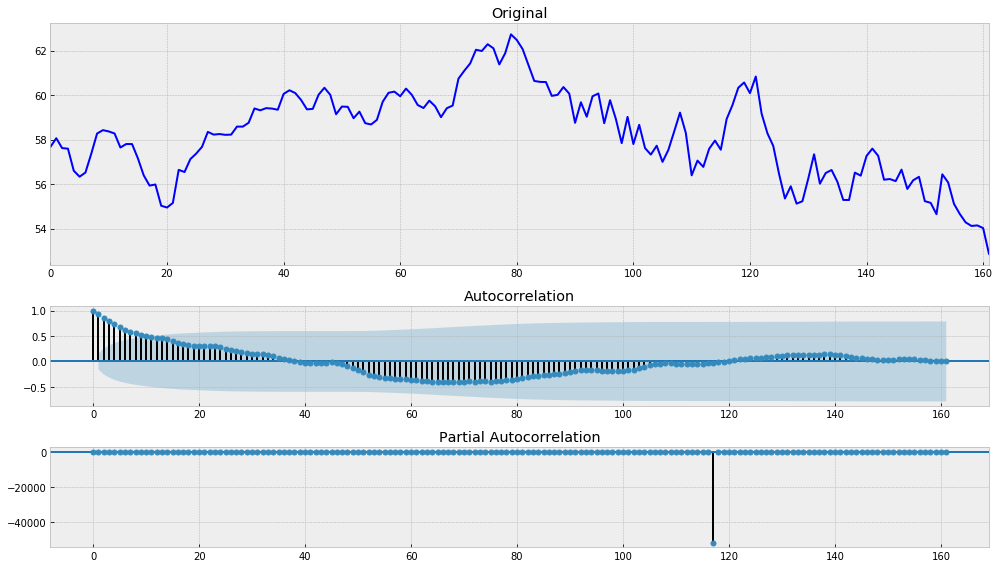

In [33]:
boxcox_dow_series = boxcox(dow_series, 0.5)
tsplot(boxcox_dow_series)

Улучшить результат не удалось, пробуем продифференцировать как исходный ряд, так и преобразованный с помощью метода Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


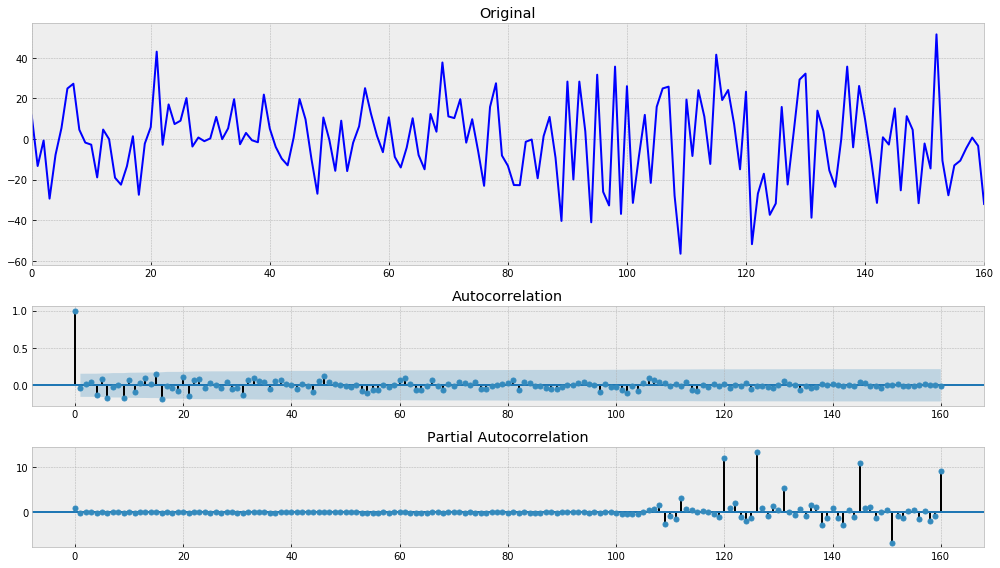

In [35]:
diff1_dow_series = np.diff(dow_series, 1)
tsplot(diff1_dow_series)

Results of Dickey-Fuller Test:
Test Statistic                  -5.043437
p-value                          0.000018
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


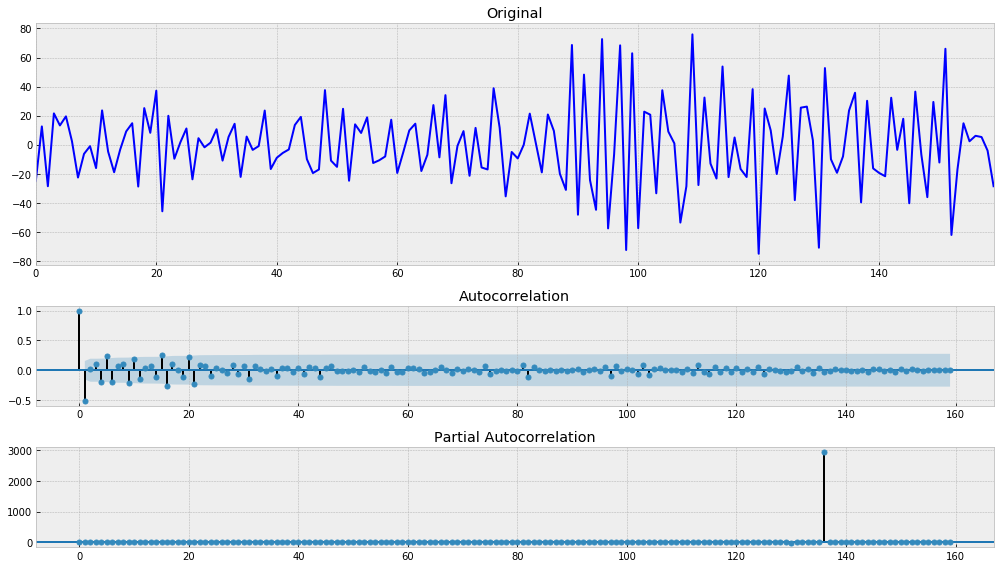

In [36]:
diff2_dow_series = np.diff(dow_series, 2)
tsplot(diff2_dow_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.301319e+01
p-value                        2.542560e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


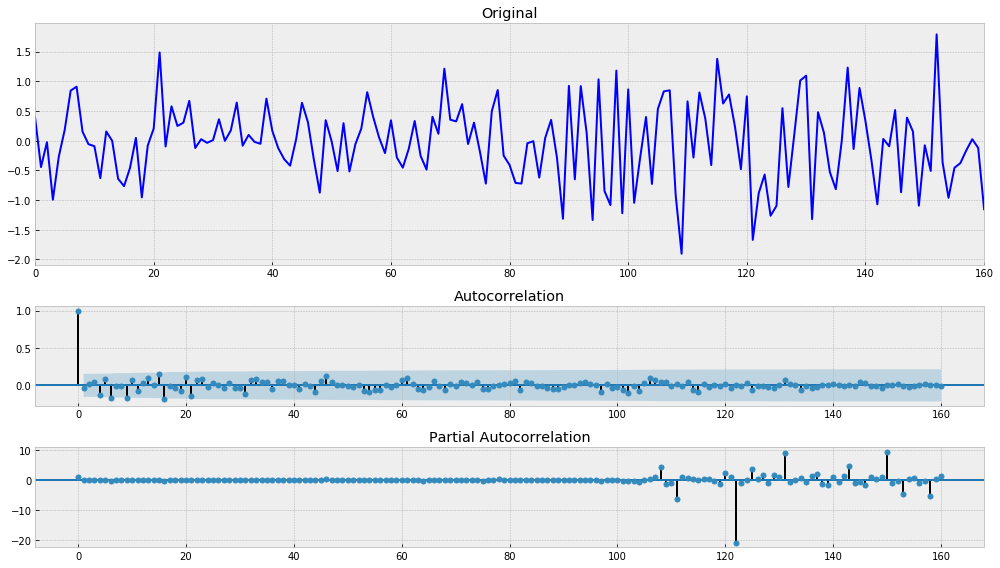

In [37]:
diff1_box_dow_series = np.diff(boxcox_dow_series, 1)
tsplot(diff1_box_dow_series)

Results of Dickey-Fuller Test:
Test Statistic                  -5.070912
p-value                          0.000016
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


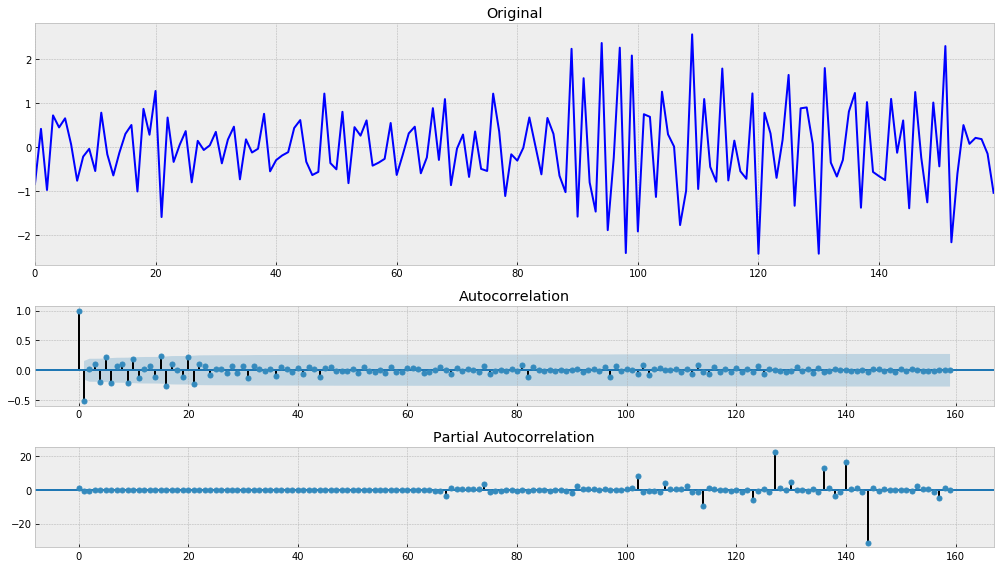

In [38]:
diff2_box_dow_series = np.diff(boxcox_dow_series, 2)
tsplot(diff2_box_dow_series)

Наилучший результат показало двойное дифференцирование на исходном ряде, приводим полученный график еще раз:

Results of Dickey-Fuller Test:
Test Statistic                  -5.043437
p-value                          0.000018
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


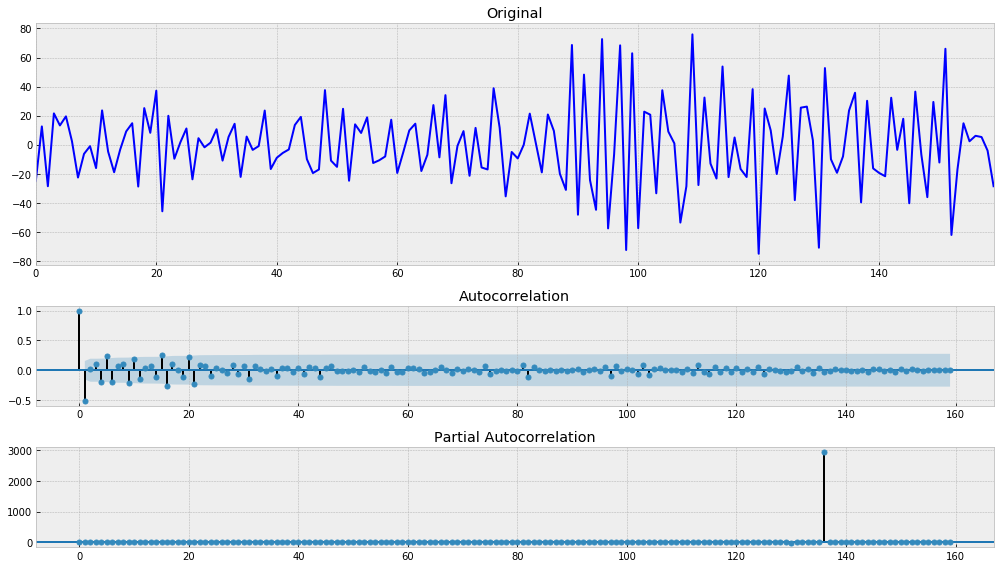

In [39]:
tsplot(diff2_dow_series)

Особой сезонности на графике не видно, да и данные у нас понедельные.

После двойной дифференцации исходного ряда мы добились как хорошего значения p-value (0.000018) теста Дики-Фуллера, так и приемлемых коррелограмм, что позволяет нам считать полученный ряд стационарным.

Тем не менее, глядя на исходный график, видно, что его можно разделить на два - восходящий тренд в начале графика и нисходящий тренд во второй половине. Попробуем разделить график пополам проанализировать по отдельности.

In [48]:
dow1 = dow_series[:81]

In [54]:
dow2 = dow_series[81:]

Results of Dickey-Fuller Test:
Test Statistic                 -0.399298
p-value                         0.910216
#Lags Used                      0.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


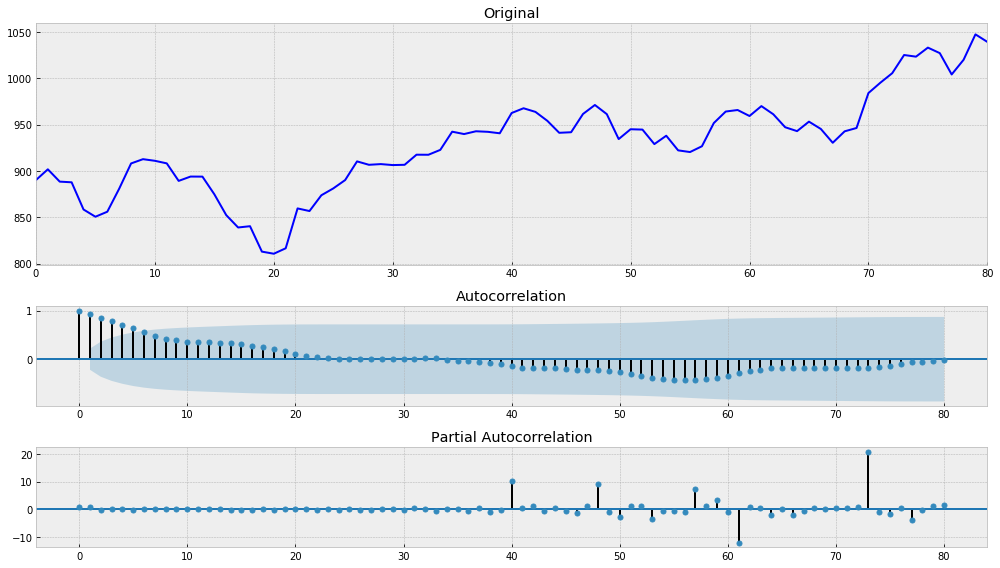

In [55]:
tsplot(dow1)

Results of Dickey-Fuller Test:
Test Statistic                 -0.450064
p-value                         0.901398
#Lags Used                      0.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


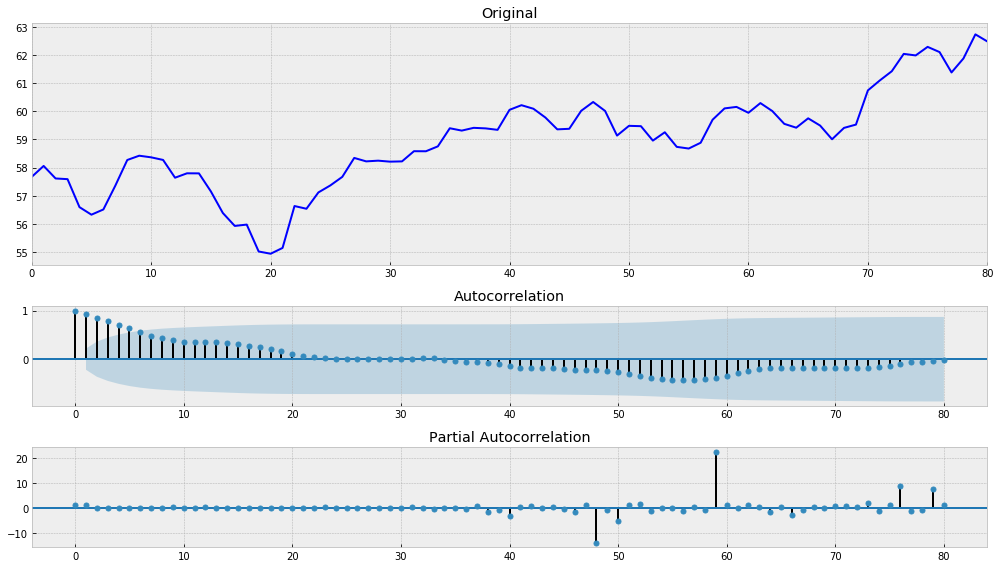

In [58]:
box_dow1 = boxcox(dow1, 0.5)
tsplot(box_dow1)

Преобразование Бокса-Кокса не произвело значимого эффекта, как и для первоначальной серии.

Попробуем убрать тренд дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                -7.283875e+00
p-value                        1.476132e-10
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


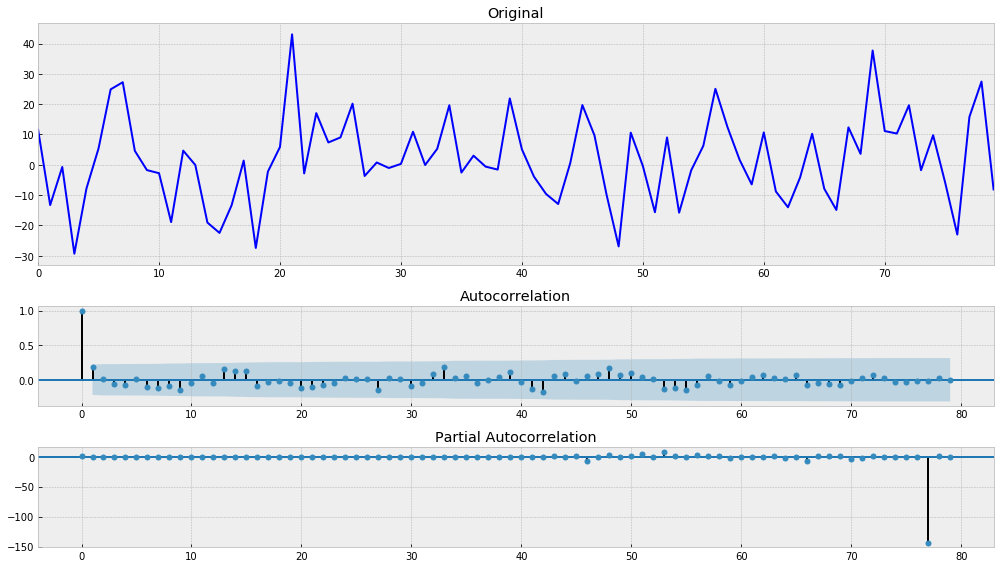

In [62]:
diff1_dow1 = np.diff(dow1, 1)
tsplot(diff1_dow1)

Уже одинарное дифференцирование первой половины исходного ряда привело к хорошему результату - как значение p-value теста Дики-Фуллера, так и кореллограммы позвояляют нам отбросить гипотезу о нестационарности ряда.

Работаем со второй половиной ряда:

Results of Dickey-Fuller Test:
Test Statistic                 -1.903051
p-value                         0.330627
#Lags Used                      0.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


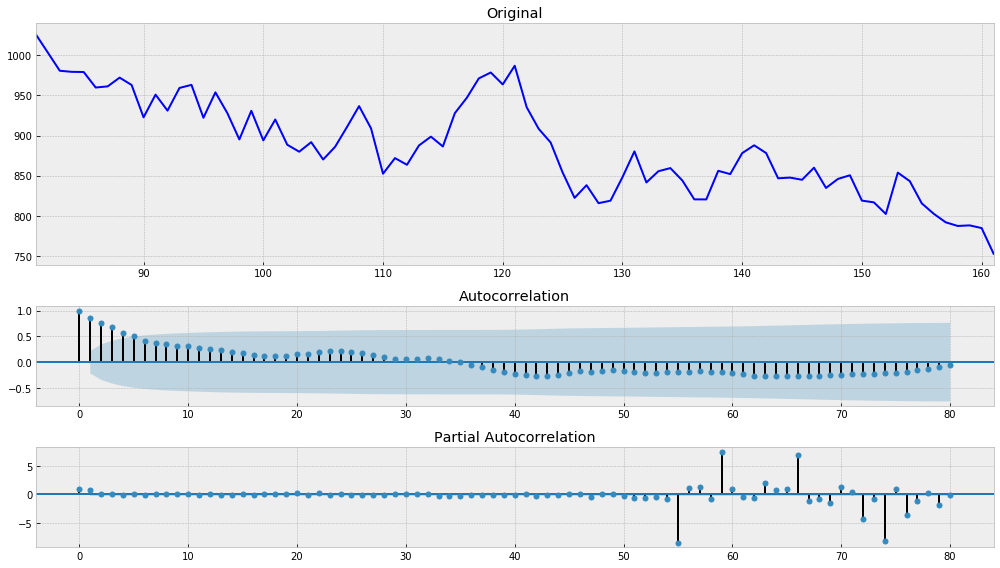

In [68]:
tsplot(dow2)

In [75]:
box_dow2 = boxcox(dow2)
tsplot(box_dow2)

Results of Dickey-Fuller Test:


ValueError: maxlag should be < nobs

Видимо, что-то случилось, пропустим Бокс-Кокос преобразование, тем более, что ранее на данной последовательности особого эффекта оно не давало.

Пробуем продифференцировать последовательность.

Results of Dickey-Fuller Test:
Test Statistic                -1.020643e+01
p-value                        5.788019e-18
#Lags Used                     0.000000e+00
Number of Observations Used    7.900000e+01
Critical Value (1%)           -3.515977e+00
Critical Value (5%)           -2.898886e+00
Critical Value (10%)          -2.586694e+00
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


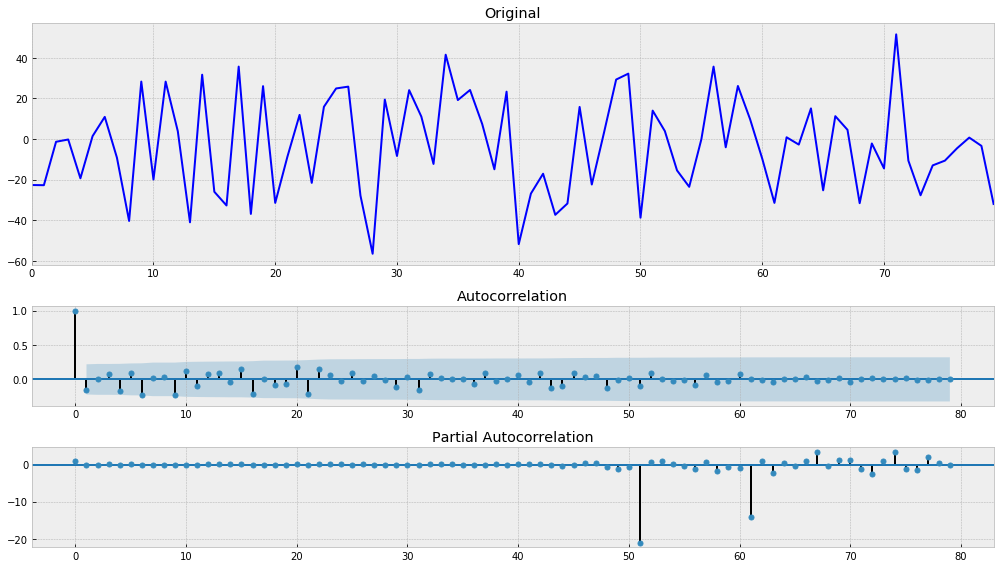

In [77]:
diff1_dow2 = np.diff(dow2, 1)
tsplot(diff1_dow2)

Results of Dickey-Fuller Test:
Test Statistic                -1.200548e+01
p-value                        3.271574e-22
#Lags Used                     1.000000e+00
Number of Observations Used    7.700000e+01
Critical Value (1%)           -3.518281e+00
Critical Value (5%)           -2.899878e+00
Critical Value (10%)          -2.587223e+00
dtype: float64


/mnt/c/linux-venv/nlp/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


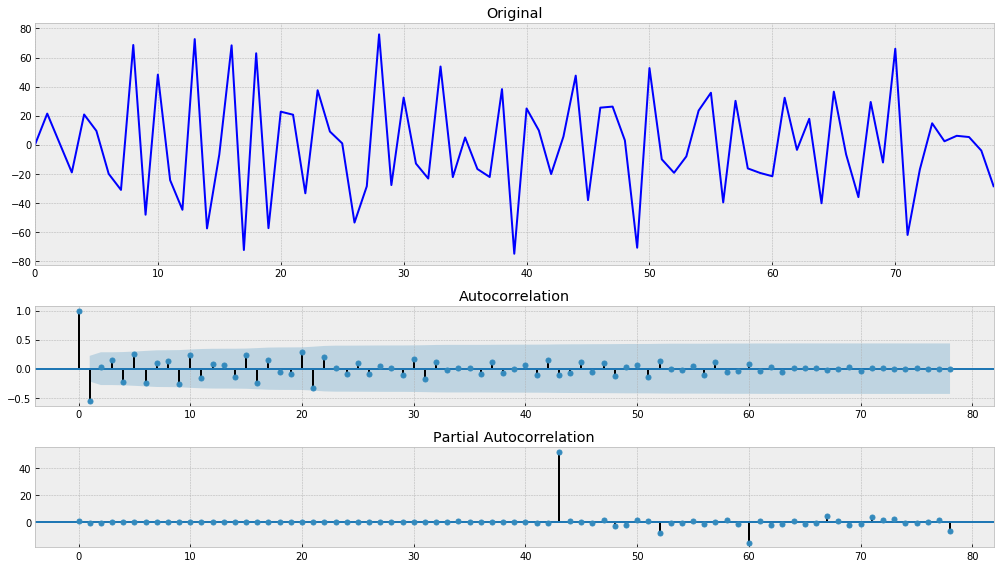

In [78]:
diff2_dow2 = np.diff(dow2, 2)
tsplot(diff2_dow2)

Как видно, двойное дифференцирование дает более красивые коррелограммы, хотя и одного в принцепе достаточно. Результ p-value теста Дики-Фуллера и для одиночного и для двойного диффернецирования позволяет откинуть гипотезу о нестационарности ряда.

Разбиение изначального ряда на две части дало немного лучший результат, чем манипуляции с иходным рядом целиком.